# Dangerous Mushrooms! Can you tell the difference?

![mushroom](./mushroom3.jpg)

## Introduction
##### Mushrooms are incredibly popular across cultures and continents and that popularity is only growing. It is estimated that in 2027 the global mushroom market will surpass 86 billion dollars. 

## Problem Statement
##### Hunting mushrooms is an extremely popular activity with avid hunters braving the outdoors after seasonal rains to find these delicious gems. Unfortunately according to an article published by NPR in May of 2023, an estimate 10,000 people fall ill due to mushroom poisoning each year and 100 will die. This is often a result of miss identifcation of mushrooms that are safe vs. mushrooms that are dangerous, often these can look very similar at first glance. 

## Research questions
##### Can we consistently, easily, and with a high degree of accuracy classify poisonous vs. safe mushroom varieties?

## Methodology
##### For our research we will use the 'Mushroom Classification' dataset on Kaggle. This dataset contains 23 columns including 22 observable mushroom characteristic columns and one binary classification column (poinsonous vs. edible). Our objective and approach is twofold we would like to achive a surefire method to classify mushroom safety using all available feature data and a machine learning model. We would also like to build a practical tool that can be used by mushroom hunters in the field to quickly and easily identify safe mushrooms. 
##### For our high degree of accuracy model we will build and tune a random forest classifier. For our field guild we will build a decision tree that is easy for hunters to follow when they do not have easy access to a computer.

## Results 

## Discussions and Implications
##### Based on our results we believe that machine learning classification is extremely promising in the dangerous mushroom arena. Continuing to expand upon tools like this could result in less sickness and less lives lost. 

## Conclusion
##### Extremely high accuracy was achieved within our test dataset. While this result is encouraging, the stakes are extremely high when miss-classification can result in sickness or death. As a result we believe our model is a good place to start but would need expanded testing before pratical use.
##### For our field model decision tree we would envisiou this being something that could be printed on a note card or in a book. Decently high accuracy was achieved. One feature that was not included in our dataset was location. We believe next steps should explore location specific mushroom data that may improve accuracy in the simplified version of our classifier.

## References
##### https://www.producebusiness.com/mushrooms-are-having-their-moment/
##### https://www.npr.org/sections/goatsandsoda/2023/05/17/1175494500/new-hope-for-an-antidote-to-death-cap-mushrooms-and-other-poison-fungi
##### https://www.kaggle.com/datasets/uciml/mushroom-classification
## Appendix
##### Corey Cassell - https://www.linkedin.com/in/corey-cassell/
##### Justus Eaglesmith - https://www.linkedin.com/in/justus-eaglesmith-0ab540167/
##### Jack Bergstrom - https://www.linkedin.com/in/john-bergstrom-v/

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Load the data
df = pd.read_csv('mushrooms.csv')

# replace single letter definitions with the full names
def replace_column_values(df, column_name, value_mapping):
    df[column_name] = df[column_name].replace(value_mapping)
    return df

# Create a mapping for each column
column_mappings = {
    'class': {'e':'edible','p':'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple',
                  'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none',
             'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange',
                   'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant',
                  's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange',
                          'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Replace values in each column
for column, mapping in column_mappings.items():
    df = replace_column_values(df, column, mapping)

# Display the updated DataFrame
print(df)


          class cap-shape cap-surface cap-color  bruises     odor  \
0     poisonous    convex      smooth     brown  bruises  pungent   
1        edible    convex      smooth    yellow  bruises   almond   
2        edible      bell      smooth     white  bruises    anise   
3     poisonous    convex       scaly     white  bruises  pungent   
4        edible    convex      smooth      gray       no     none   
...         ...       ...         ...       ...      ...      ...   
8119     edible   knobbed      smooth     brown       no     none   
8120     edible    convex      smooth     brown       no     none   
8121     edible      flat      smooth     brown       no     none   
8122  poisonous   knobbed       scaly     brown       no    fishy   
8123     edible    convex      smooth     brown       no     none   

     gill-attachment gill-spacing gill-size gill-color  ...  \
0               free        close    narrow      black  ...   
1               free        close     broad  

In [66]:
# Step 2: Overview of the dataset
print("Dataset Overview:")
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display basic information about the dataset (e.g., data types, non-null counts)

# Step 3: Summary statistics
print("Summary Statistics:")
print(df.describe())



Dataset Overview:
       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white

In [67]:
# Step 4: Explore variation in each column
for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Unique Values: {df[column].nunique()}")
    print(df[column].value_counts(normalize=True))  # Display proportions for unique values
#     We have a lot of classes with very rare observations.Consider consensing rare categories to prevent curse of dimensionality


Column: class
Unique Values: 2
edible       0.517971
poisonous    0.482029
Name: class, dtype: float64

Column: cap-shape
Unique Values: 6
convex     0.450025
flat       0.387986
knobbed    0.101920
bell       0.055638
sunken     0.003939
conical    0.000492
Name: cap-shape, dtype: float64

Column: cap-surface
Unique Values: 4
scaly      0.399311
smooth     0.314623
fibrous    0.285574
grooves    0.000492
Name: cap-surface, dtype: float64

Column: cap-color
Unique Values: 10
brown       0.281142
gray        0.226489
red         0.184638
yellow      0.131955
white       0.128016
buff        0.020679
pink        0.017725
cinnamon    0.005416
purple      0.001969
green       0.001969
Name: cap-color, dtype: float64

Column: bruises
Unique Values: 2
no         0.584441
bruises    0.415559
Name: bruises, dtype: float64

Column: odor
Unique Values: 9
none        0.434269
foul        0.265879
fishy       0.070901
spicy       0.070901
almond      0.049237
anise       0.049237
pungent     0.03

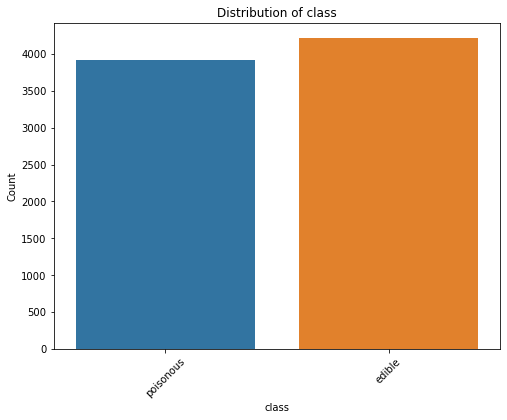

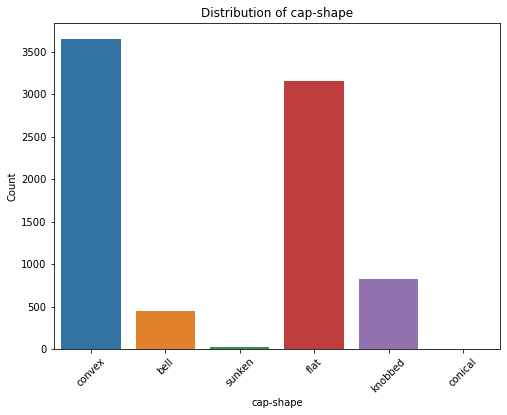

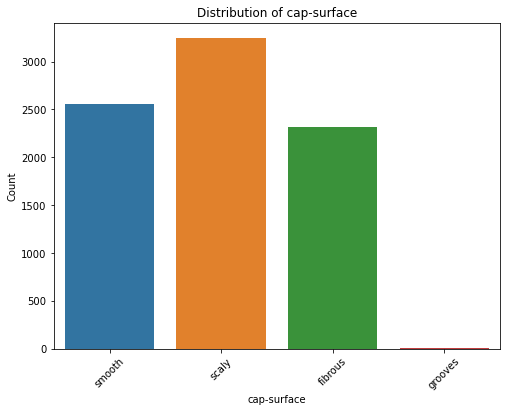

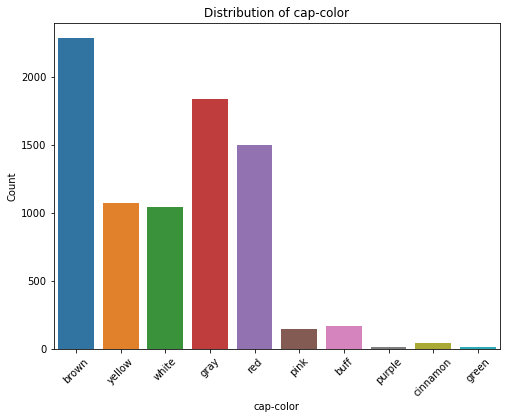

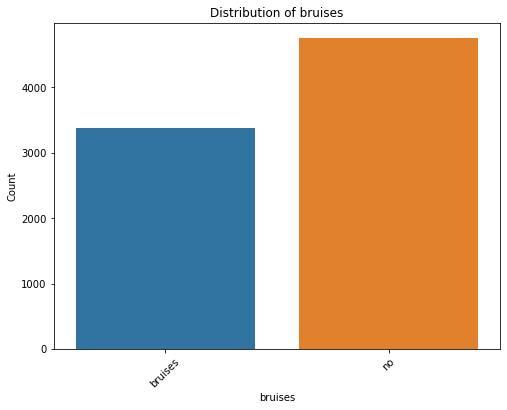

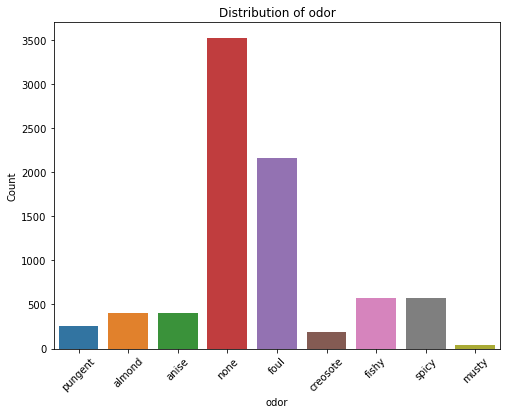

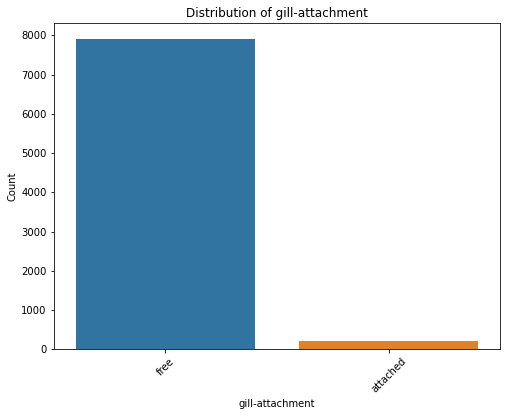

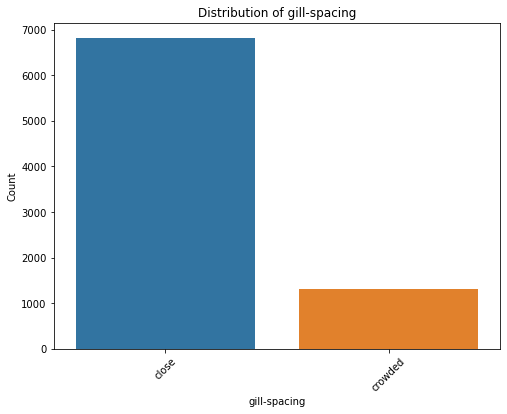

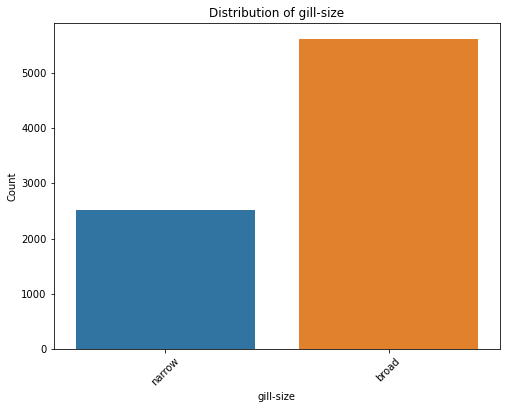

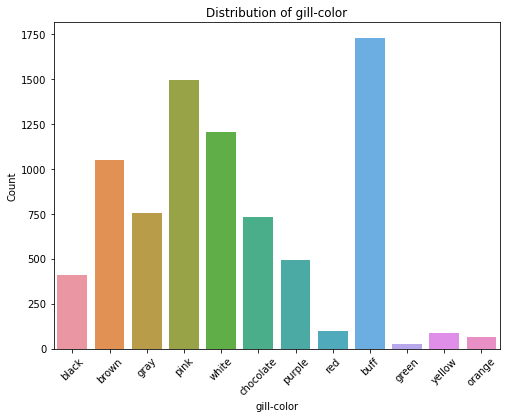

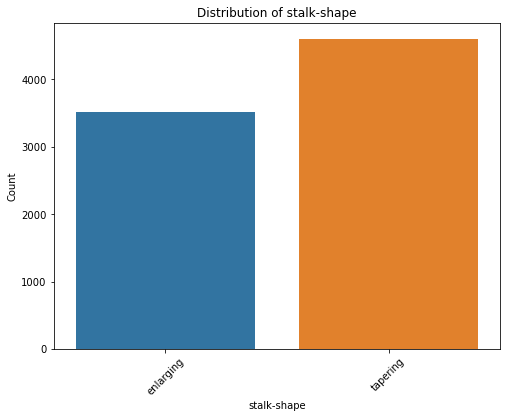

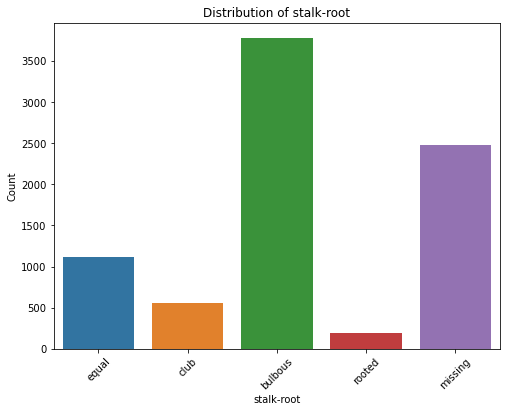

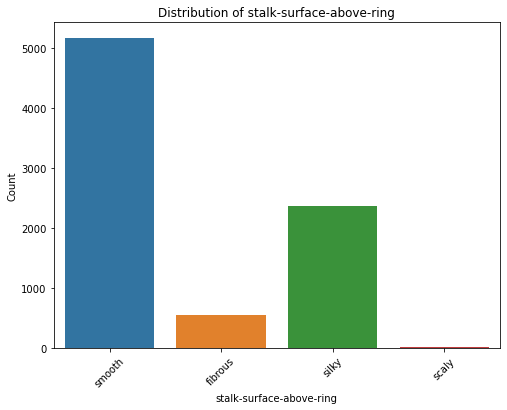

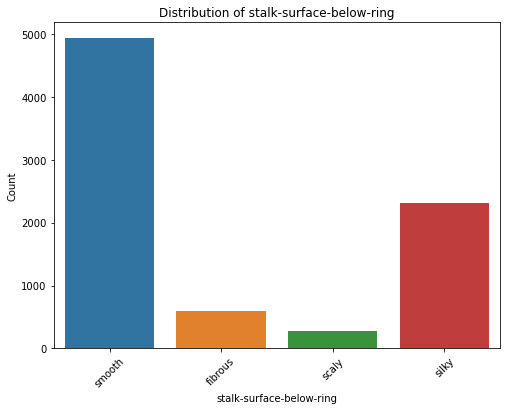

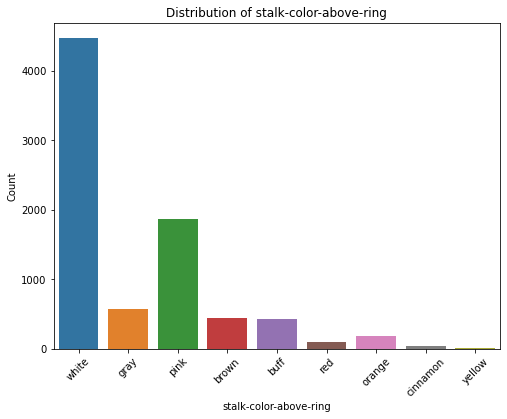

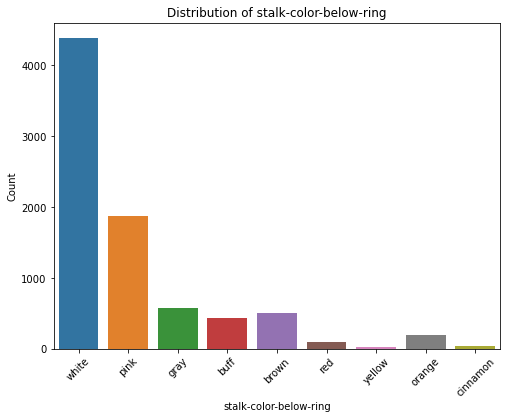

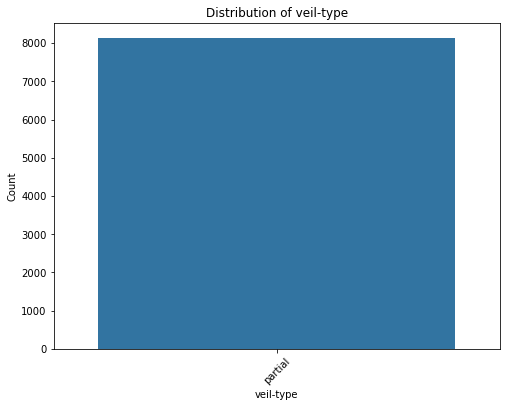

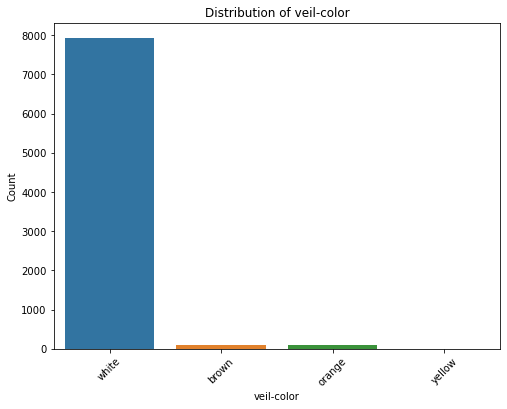

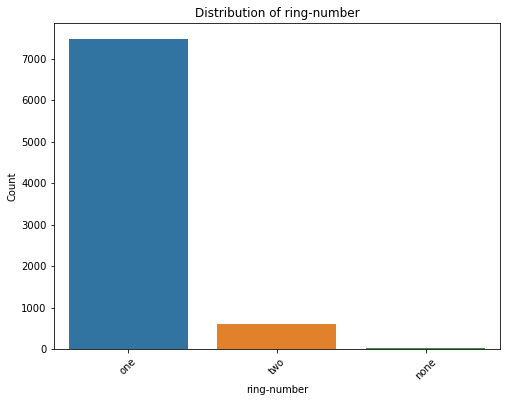

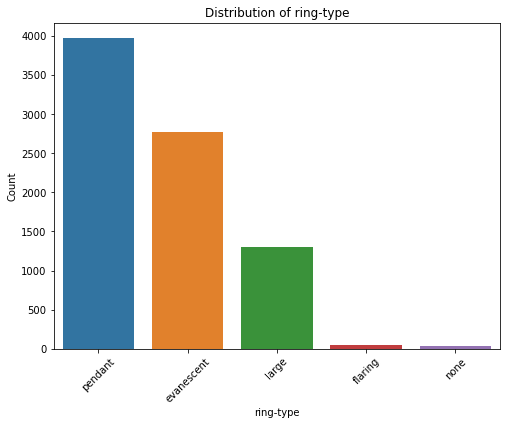

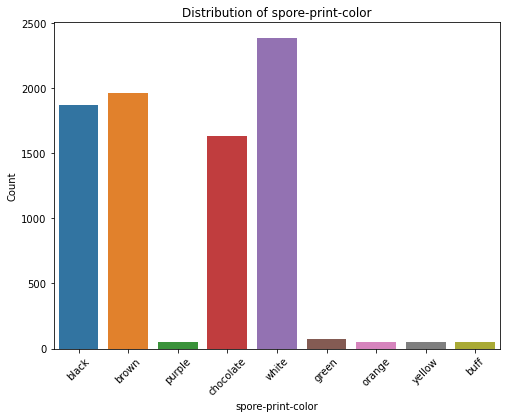

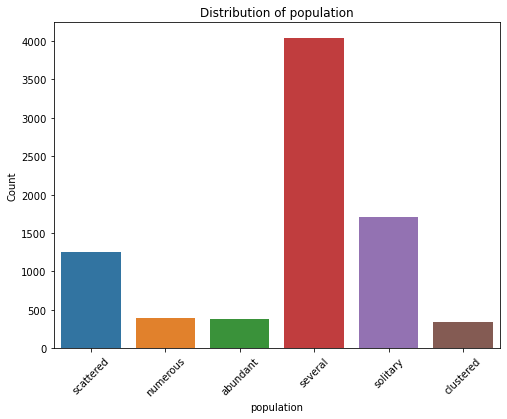

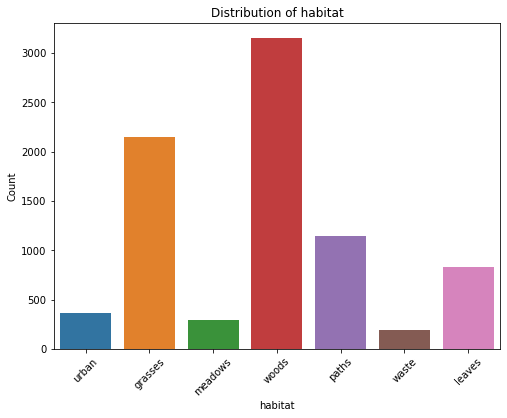

In [68]:
# Step 5: Visualizations for proportions
for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

In [69]:
# Convert categorical features to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Perform hierarchical clustering
num_clusters = 2  # Specify the number of clusters you want
clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering.fit_predict(df)

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the cluster assignments
print("Cluster Assignments:")
print(df[['cluster']])

# If needed, you can also perform further analysis on each cluster.
# For example, you can calculate the mean or mode of each feature within each cluster.
cluster_means = df.groupby('cluster').mean()
cluster_modes = df.drop('cluster', axis=1).mode()

print("Cluster Means:")
print(cluster_means)

print("Cluster Modes:")
print(cluster_modes)


Cluster Assignments:
      cluster
0           0
1           0
2           0
3           0
4           0
...       ...
8119        0
8120        0
8121        0
8122        1
8123        0

[8124 rows x 1 columns]
Cluster Means:
            class  cap-shape  cap-surface  cap-color  bruises      odor  \
cluster                                                                   
0        0.342089   2.354597     1.538462   4.545966  0.47217  4.731082   
1        1.000000   3.000000     2.500000   3.500000  1.00000  5.000000   

         gill-attachment  gill-spacing  gill-size  gill-color  ...  \
cluster                                                        ...   
0               0.967167      0.205128   0.122577    5.466854  ...   
1               1.000000      0.000000   1.000000    2.000000  ...   

         stalk-surface-below-ring  stalk-color-above-ring  \
cluster                                                     
0                        2.404628                5.297061   
1     

In [70]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,1,2,3,0,0,7,1,0,1,0,...,7,7,0,2,1,4,0,3,4,0
1,0,2,3,9,0,0,1,0,0,0,...,7,7,0,2,1,4,1,2,0,0
2,0,0,3,8,0,1,1,0,0,1,...,7,7,0,2,1,4,1,2,2,0
3,1,2,2,8,0,7,1,0,1,1,...,7,7,0,2,1,4,0,3,4,0
4,0,2,3,3,1,6,1,1,0,0,...,7,7,0,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,4,4,0,1,1,4,2,1,1,0
8120,0,2,3,0,1,6,0,0,0,11,...,4,4,0,0,1,4,2,4,1,0
8121,0,3,3,0,1,6,0,0,0,1,...,4,4,0,1,1,4,2,1,1,0
8122,1,4,2,0,1,3,1,0,1,2,...,7,7,0,2,1,0,7,4,1,1


# 4.1 Random Forest
##### The confusion matrix output shows 100% accuracy, by far our best model performance. 

In [71]:
X = df.drop('class', axis=1)  
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0


### Random forest feature importance
##### Graphing feature importance shows us which features capture the largest amount of classification variation. Odor, Spore Print Color, and Gill Size are the top three contributing features.

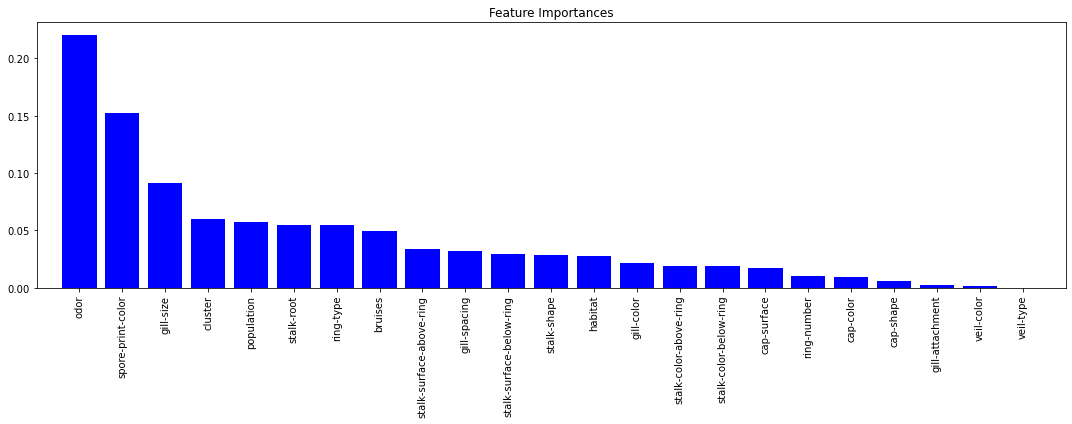

In [72]:
feature_importances = rfc.feature_importances_

indices = np.argsort(feature_importances)[::-1]
features = X.columns  

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()  
plt.show()


# 4.2 support vector machine

In [73]:
svc = SVC(kernel='linear', random_state=42)

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[824  19]
 [ 15 767]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       843
           1       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

0.9790769230769231


# 4.3 clustering Kmeans

In [74]:
kmeans = KMeans(n_clusters=2, random_state=42)  

kmeans.fit(X)

cluster_assignments = kmeans.labels_

df['cluster'] = cluster_assignments

print(df['cluster'].value_counts())


1    4641
0    3483
Name: cluster, dtype: int64


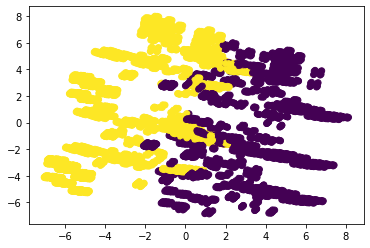

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')

plt.show()


# Bonus Classification Models, how many features are enough?
##### Here we examine model output accuracy using only the top features (based on importance)

In [76]:
#selected_columns = ['class','odor','spore-print-color','gill-size']
selected_columns = ['class','odor','spore-print-color']
df2 = df[selected_columns]
df2

,class,odor,spore-print-color
0,1,7,0
1,0,0,1
2,0,1,1
3,1,7,0
4,0,6,1
...,...,...,...
8119,0,6,2
8120,0,6,2
8121,0,6,2
8122,1,3,7


##### With only 2 features we still achieve .99 accuracy

In [77]:
X = df2.drop('class', axis=1)  
y = df2['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[843   0]
 [ 11 771]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

0.9932307692307693


## Reducing Risk and Simplifying Field Identifcation

##### Visualizing the decision making process using a decision tree. Potentially a tool similar to this could be used as a field guide. Narrowing down potentially risky mushrooms to the hunting region may further improve accuracy in a simple model like this where there is also no room for error. 

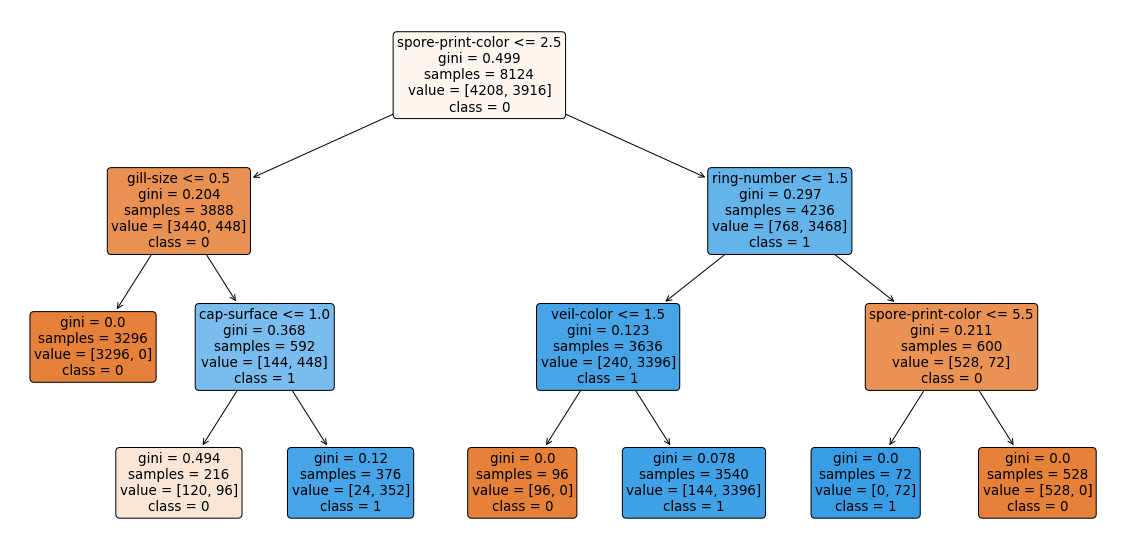

In [78]:
X = df.drop('class', axis=1)  
y = df['class']

clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0','1'], rounded=True)
plt.show()


##### How often will you survive? Most of the time!

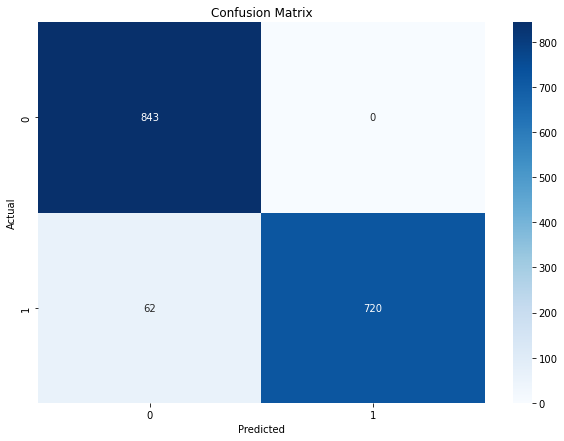

In [79]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
